### **GRUPO 1**

JAIME ALVAREZ URUEÑA 

ALVARO FRAILE CARMENA 

ALEJANDRO MENDOZA MEDINA 

## Dependencias

In [1]:
# Dependencias - EJECUTA ESTA CELDA ANTES DE COMENZAR

# El paquete nnfs incluye la base de datos de entrenamiento que vamos a usar, y asegura que las semillas de los métodos random sean consistentes, para que nuestros resultados sean comparables
# %pip install -q nnfs
# %pip install -q numpy matplotlib

import nnfs
import matplotlib.pyplot as plt
import numpy as np

nnfs.init()

# Esta función la usaremos más adelante para ver los resultados de la red
# works only for model = model = [dense1, activation1, dense2, loss_activation]

def plot_prediction_performance_spiral(
        model: list | tuple,
        X, y,
        num_points: int = 100,
        ) -> None:
    """Plots the performance of the model in the spiral dataset with 3 categories"""

    def probabilities_to_rgb(probabilities_array):
        """ Maps an array of probabilities to RGB colors."""

        # Ensure that probabilities sum up to 1 for all data points
        if not np.all(np.isclose(np.sum(probabilities_array, axis=1), 1.0)):
            raise ValueError("Probabilities must sum up to 1 for all data points.")

        # Map probabilities to RGB channels (0-255) for all data points
        r, g, b = (probabilities_array * 255).astype(int).T

        # Return the RGB colors as a NumPy array
        return np.column_stack((r, g, b))

    # Create a meshgrid of points in the (-1,1)x(-1,1) space
    x_val = np.linspace(-1, 1, num_points)
    y_val = np.linspace(-1, 1, num_points)

    x_grid, y_grid = np.meshgrid(x_val, y_val)

    # Flatten the grids into 1D arrays
    x_flat = x_grid.flatten()
    y_flat = y_grid.flatten()

    # Combine the flattened arrays into an Nx2 array
    XX_tuples = np.column_stack((x_flat, y_flat))

    # Perform a forward pass through the network
    input = XX_tuples
    for layer in model[:-1]:
        layer.forward(input)
        input = layer.output

    # Assumed last layer is a softmax activation + loss function
    # 'y_true' here is random since it will not be used
    # (only the output of the softmax is needed)
    model[-1].forward(input, y_true=np.array([0]*len(model[-2].output)))

    probabilities_array = model[-1].output
    rgb_colors = probabilities_to_rgb(probabilities_array)
    probs_2d = rgb_colors.reshape(num_points, num_points,3)

    # Assumed 3 categories - change this if different
    colors = ['r' if label == 0 else 'g' if label == 1 else 'b' for label in y]

    plt.imshow(probs_2d, extent=(-1, 1, -1, 1), interpolation='bilinear')
    plt.scatter(X[:, 0], -X[:, 1], c = colors)
    #plt.axis('off')  # Turn off axis labels and ticks
    plt.show()# print(rgb_colors)  # This will print the RGB color array
    # plt.pcolor(xx, yy, rgb_colors)
    # plt.show()


## Ejercicio 1: Una neurona simple

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=neurona_simple.png&t=04gzB6Klm7RQkH6&scalingup=0" width="250"/>
</div>
</center>

Calcula el output de una neurona simple con cuatro inputs: $[1.0, 2.0, 3.0, 2.5]$, donde los correspondientes pesos son $[0.2, 0.8, -0.5, 1.0]$, y el sesgo es $2.0$.

In [2]:
# SOL EJ 1

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] +
          inputs[3] * weights[3] +
          bias
          )

print(output)

4.8


## Ejercicio 2: Una capa de neuronas

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple.png&t=IvPdbEiQJ9gFVxo&scalingup=0" width="250"/>
</div>
</center>

Calcula la salida de una capa de neuronas con cuatro entradas ($[1, 2, 3, 2.5]$) y tres neuronas:
 - Neurona 1: Pesos = $[0.2, 0.8, -0.5, 1]$, Sesgo = $2$
 - Neurona 2: Pesos = $[0.5, -0.91, 0.26, -0.5]$, Sesgo = $3$
 - Neurona 3: Pesos = $[-0.26, -0.27, 0.17, 0.87]$, Sesgo = $0.5$
  
Calcula la salida directamente sobre una lista, calculando para cada elemento las operaciones necesarias entre inputs, pesos y sesgos.


In [3]:
# SOL EJ 2

inputs = [1.0, 2.0, 3.0, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [# neurona 1
          inputs[0] * weights1[0] + inputs[1] * weights1[1] + inputs[2] * weights1[2] + inputs[3] * weights1[3] + bias1,
          # neurona 2
          inputs[0] * weights2[0] + inputs[1] * weights2[1] + inputs[2] * weights2[2] + inputs[3] * weights2[3] + bias2,
          # neurona 3
          inputs[0] * weights3[0] + inputs[1] * weights3[1] + inputs[2] * weights3[2] + inputs[3] * weights3[3] + bias3,
         ]

print(output)


[4.8, 1.21, 2.385]


# Ejercicio 3: Una capa de neuronas - generalización

Repite el ejercicio 2, pero utiliza un enfoque más general que permita realizar las mismas operaciones por neuronas de forma secuencial (utiliza un bucle ```for```). El formato de datos de entrada ahora es el siguiente:

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

In [5]:
# SOL EJ 3

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0

    for input, weight in zip(inputs, neuron_weights):
        neuron_output += input * weight

    neuron_output += neuron_bias

    layer_outputs.append(neuron_output)

print(layer_outputs)

[4.8, 1.21, 2.385]


# Ejercicio 4: Prueba de eficiencia

Copia tu solución anterior, pero ahora utiliza un tamaño creciente de los datos de entrada: $n = [5, 50, 500, 5000]$. Genera listas del tamaño apropiado para los inputs, pesos y sesgos que contengan números aleatorios entre $1$ y $3$ para las entradas y sesgos y entre $-1$ y $1$ para los pesos. Supón distribuciones uniformes. Observa el rendimiento de tu implementación cuando $n$ crece.

In [6]:
# ##################### PEDIDO #####################
# SOL EJ 4

import numpy as np
import time

# Function to execute the code block with specified sizes
def efficiency_code_test(inputs_size: int, num_neurons: int) -> None:
    inputs = np.random.uniform(1.0, 3.0, inputs_size)
    weights = [np.random.uniform(-1.0, 1.0, inputs_size) for _ in range(num_neurons)]
    biases = np.random.uniform(1.0, 3.0, num_neurons)
    layer_outputs = []

    for neuron_weights, neuron_bias in zip(weights, biases):
        neuron_output = 0

        for input, weight in zip(inputs, neuron_weights):
            neuron_output += input * weight

        neuron_output += neuron_bias
        layer_outputs.append(neuron_output)
# -----------------------------------------------
input_sizes = [5, 50, 500, 5000, 50000]
num_neurons = 3

for size in input_sizes:
    start_time = time.time()
    efficiency_code_test(size, num_neurons)
    end_time = time.time()
    print(f"Tiempo para {size} inputs: {end_time - start_time:.5f} seconds")

Tiempo para 5 inputs: 0.00000 seconds
Tiempo para 50 inputs: 0.00000 seconds
Tiempo para 500 inputs: 0.00000 seconds
Tiempo para 5000 inputs: 0.00636 seconds
Tiempo para 50000 inputs: 0.02346 seconds


In [7]:
import numpy as np
import timeit

def efficiency_code_test(inputs_size: int, num_neurons: int) -> None:
    inputs = np.random.uniform(1.0, 3.0, inputs_size)
    weights = [np.random.uniform(-1.0, 1.0, inputs_size) for _ in range(num_neurons)]
    biases = np.random.uniform(1.0, 3.0, num_neurons)
    layer_outputs = []

    for neuron_weights, neuron_bias in zip(weights, biases):
        neuron_output = 0

        for input, weight in zip(inputs, neuron_weights):
            neuron_output += input * weight

        neuron_output += neuron_bias
        layer_outputs.append(neuron_output)

def benchmark(inputs_size: int, num_neurons: int) -> None:
    return lambda: efficiency_code_test(inputs_size, num_neurons)
# -----------------------------------------------
input_sizes = [5, 50, 500, 5000, 50000]
num_neurons = 3

for size in input_sizes:
    execution_time = timeit.timeit(benchmark(size, num_neurons), number=10)  # Run 10 times
    print(f"Tiempo medio para {size} inputs: {execution_time / 10:.5f} seconds")

Tiempo medio para 5 inputs: 0.00006 seconds
Tiempo medio para 50 inputs: 0.00004 seconds
Tiempo medio para 500 inputs: 0.00023 seconds
Tiempo medio para 5000 inputs: 0.00212 seconds
Tiempo medio para 50000 inputs: 0.02129 seconds


## Ejercicio 5: Una neurona simple usando ```numpy```

Reimplementa el ejercicio 1 usando el paquete ```numpy```


In [8]:
# SOL EJ 5

import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2.0

outputs = np.dot(inputs, weights) + bias

print(outputs)

4.799999952316284


## Ejercicio 6: Una capa de neuronas usando ```numpy```

Reimplementa el ejercicio 2 usando el paquete ```numpy```. Realiza una prueba de eficiencia similar a la que realizaste en el ejercicio 4.


In [9]:
import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2.0, 3.0, 0.5])

In [10]:
#SOL EJ 6

layer_output = np.dot(weights, inputs) +  biases

print(layer_output)

[4.79999995 1.21000004 2.38499999]


## Ejercicio 7: Una capa de neuronas con datos en *batch*

Implementa el *forward pass* de una neurona simple asumiendo que la entrada son datos en lote (*batch*). Es decir, la entrada ahora será una matriz, donde cada fila corresponderá a una observación. Por tanto, la salida también será de dimensión 2. Considera los datos dados a continuación:

In [11]:
import numpy as np

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
         [0.5, -0.91, 0.26, -0.5],
         [-0.26, -0.27, 0.17, 0.87]])
bias = np.array([2.0, 3.0, 0.5])

In [12]:
# SOL EJ 7
layer_output = np.dot(inputs, weights.T) + bias

print(layer_output)

[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]


## Ejercicio 8: Red neuronal con una *hidden layer*

Implementa el *forward pass* de una red con la siguiente arquitectura: una capa de entrada (4 inputs), una hidden layer de 3 neuronas y una capa de salida también con 3 neuronas. Utiliza los datos dados a continuación:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=red_simple.png&t=IkHbjPoTjUPoGWt&scalingup=0" width="250"/>
</div>
</center>



In [13]:
import numpy as np

inputs = np.array([
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
])

weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

biases = np.array([2, 3, 0.5])

weights2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
])

biases2 = np.array([-1, 2, -0.5])

In [14]:
# SOL EJ 8
layer1_outputs = np.dot(inputs, weights.T) + biases
layer2_outputs = np.dot(layer1_outputs, weights2.T) + biases2

print(layer2_outputs)

[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]


## Ejercicio 9: Capa de neuronas usando Programación Orientada a Objetos

Crea una clase llamada ```Layer_Dense```, cuyos parámetros de entrada sean ```n_inputs``` (número de inputs a la capa) y ```n_neurons``` (número de neuronas que contiene la capa). Además, en su constructor deben inicializarse dos variables:
 - ```self.weights```: una matriz que contenga los pesos. Deben inicializarse en números aleatorios entre 0 y 0.01.
 - ```self.biases```: un vector columna que contenga los sesgos. Deben inicializarse en $0$.

Implementa un único método llamado ```forward(self, inputs)``` que, dados unos inputs a la capa, realice el *forward pass*.

In [15]:
#SOL EJ 9
import numpy as np

class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

dense1 = Layer_Dense(4, 3)

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
                   [2.0, 5.0, -1.0, 2.0],
                   [-1.5, 2.7, 3.3, -0.8]])

dense1.forward(inputs)

print(dense1.output)

[[ 0.05483776  0.01926849  0.00722754]
 [-0.01476284 -0.03086168  0.05357479]
 [-0.01122333  0.0101726  -0.00251297]]


## Ejercicio 10: *Forward pass* de datos de entrenamiento — Triple espiral

A continuación se describe un problema de clasificación con tres categorías. La base de datos mostrada abajo ha sido generada a partir de la ecuación de 3 espirales distintas, añadiendo ruido. Se trata de un problema complejo por su alta no-linealidad. Observa toda la base de datos:

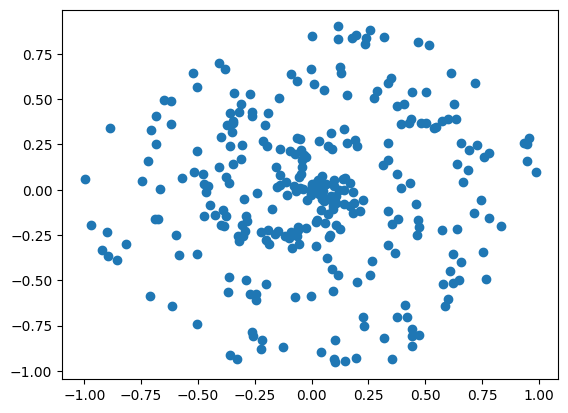

In [16]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Resaltando por colores cada categoría se aprecia mejor su naturaleza:

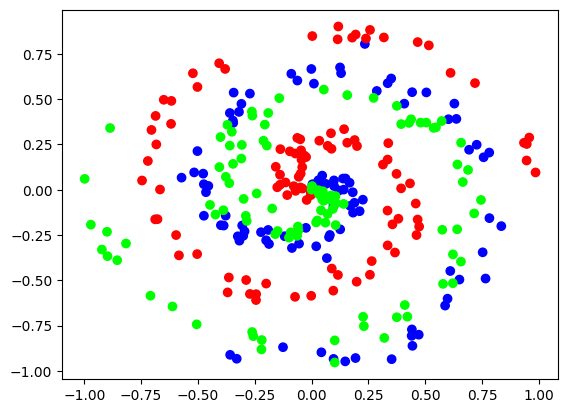

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Realiza un *forward pass* de los datos de entrada ```X``` en una capa de 3 neuronas.

In [18]:
# SOL EJ 10

import nnfs
import numpy as np

# Set seed for reproducibility. Keep this!
nnfs.init()

X, y = spiral_data(samples=100, classes=3)

# 2 es el número de features de cada instancia de mi bd
dense1 = Layer_Dense(2, 3)

dense1.forward(X)

print(dense1.output)
print(f"{len(dense1.output)=}")

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.04751882e-04  1.13953611e-04 -4.79834998e-05]
 [-2.74148420e-04  3.17291502e-04 -8.69217984e-05]
 [-4.21883655e-04  5.26662567e-04 -5.59126820e-05]
 [-5.77076804e-04  7.14014051e-04 -8.94304394e-05]
 [-3.54306976e-04  3.50254879e-04 -2.33634812e-04]
 [-8.92670010e-04  1.07678759e-03 -1.94532375e-04]
 [-9.33507807e-04  1.07238023e-03 -3.12273973e-04]
 [-1.12437585e-03  1.31128007e-03 -3.36296740e-04]
 [-1.33869553e-03  1.62009057e-03 -2.81017943e-04]
 [-1.48779724e-03  1.79484230e-03 -3.23859538e-04]
 [-1.20035873e-03  1.58119109e-03  8.65937000e-06]
 [-1.56528328e-03  1.99173321e-03 -1.30997345e-04]
 [-1.85718178e-03  2.30642664e-03 -2.70479388e-04]
 [-1.78093580e-03  2.27836682e-03 -1.24245722e-04]
 [-1.85300526e-03  2.38476763e-03 -1.00471654e-04]
 [-6.99865050e-04  1.11472746e-03  3.96097894e-04]
 [-2.19024252e-03  2.79446482e-03 -1.68075712e-04]
 [-1.69829139e-03  2.29598465e-03  1.31671681e-04]
 [-2.60229013e-03  3.27291898e-

## Ejercicio 11: Función de activación ReLU

Programa una clase llamada ```Activation_ReLU``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación ReLU a los inputs pasados como argumento.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=relu.png&t=reweQCjpTXGOQZ4&scalingup=0" width="350"/>
</div>
</center>


In [19]:
# SOL EJ 11

class Activation_ReLU:

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

## Ejercicio 12: Función de activación ```Softmax```
El objetivo de este ejercicio es llegar a una clase llamada ```Activation_Softmax``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación Softmax a los inputs pasados como argumento. En teoría la función Softmax se formula como

$$
S_{i, j}=\frac{e^{z_{i, j}}}{\sum_{l=1}^L e^{z_{i, l}}}
$$
siendo los $z_j$ el output de la neurona $j$ (y por tanto, input de la función de activación). El índice $i$ hace referencia a la observación $i$ considerada.

Para conseguir una implementación robusta, haremos alguna modificación en la formulación anterior. Siguie el siguiente proceso:


 - **12.a** Dada una única observación ```layer_outputs = [4.8, 1.21, 2.385]``` (se supone salida de una capa), aplica la función Softmax anterior (de momento, no es necesario que programes ninguna clase).

In [20]:
# SOL EJ 12a
layer_outputs = [4.8, 1.21, 2.385]

exp_values = np.exp(layer_outputs)
normalized_values = exp_values / np.sum(exp_values)

print(normalized_values)

[0.89528266 0.02470831 0.08000903]


 - **12.b** Dados los siguientes datos en lote, aplica la función Softmax a cada observación.

In [21]:
# SOL EJ 12b

layer_outputs = np.array([[4.8, 1.21, 2.385],
                          [8.9, -1.81, 0.2],
                          [1.41, 1.051, 0.026]])

exp_values = np.exp(layer_outputs)
norm_factor = np.sum(exp_values, axis=1, keepdims=True)
normalized_values = exp_values / norm_factor

print(normalized_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


 - **12.c** En el proceso de exponenciación anterior, resta al input considerado el máximo valor de dicha observación. Esto pretende evitar que los valores se disparen al exponenciar (*exloding values*). Así mismo, encapsula el código anterior en una clase ```Activation_Softmax``` que implemente únicamente un método: ```forward(self, inputs)```


In [22]:
# SOL EJ 12c

class Activation_Softmax:

    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

## Ejercicio 13: *Forward pass* de una red con funciones de activación

Dado un conjunto de datos de entrada $X$, construye una red neuronal que conste de dos capas densas y funciones de activación ReLU y Softmax. El objetivo es realizar un *forward pass* a través de esta red. Los datos de entrada corresponde con los presentados en el ejercicio 10:

In [23]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

La arquitectura de la red debe ser:
 - Input de dos features (las coordenadas de los puntos)
 - Hidden layer, con entrada de 2 valores y salida de 3. Función de activación ReLU.
 - Capa de salida, con entrada de 3 valores y salida también de 3 valores (correspondientes a las tres categorías del problema de clasificación). Función de activación Softmax.

Realiza un forward pass de los datos hasta la última función (softmax) e imprime por pantalla el output para las 5 primeras observaciones. Reutiliza las clases implementadas en ejercicios anteriores.

In [24]:
# SOL EJ 13

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


## Ejercicio 14: Función de pérdidas — entropía cruzada. Caso particular

Imagina que estamos tratando de clasificar entre las categorías "perro", "gato" o "humano". Un perro es la clase 0 (en el índice 0), un gato la clase 1 (índice 1) y un humano la clase 2 (índice 2). Supongamos que tenemos una arquitectura como la del ejercicio anterior y que tenemos un batch de tres observaciones, que han dado lugar a los siguientes valores de salida en la última capa:

In [25]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],  # perro -> índice 0
                            [0.1, 0.5, 0.4],  # gato -> índice 1
                            [0.02, 0.9, 0.08]])  # gato -> índice 1

Recuerda que estos valroes representan la **confianza del modelo en cada clase**, para cada observación. Disponemos también de las etiquetas (valores objetivo) para estas tres observaciones: son un perro, un gato y un gato:

In [26]:
class_targets = [0, 1, 1] # perro, gato, gato

# FORMA 1 DE DAR LOS VALORES OBJETIVO y: SPARSE VALUES
# observacion 0 -> perro -> 0
# observacion 1 -> gato -> 1
# observacion 2 -> gato -> 1

# FORMA 2 DE DAR LOS VALORES OBJETIVO y: ONE-HOT VECTORS
# observacion 0 -> "SÍ es un perro, NO es un gato, NO es un humano" -> [1, 0, 0]
# observacion 1 -> "NO es un perro, SÍ es un gato, NO es un humano" -> [0, 1, 0]
# observacion 2 -> "NO es un perro, SÍ es un gato, NO es un humano" -> [0, 1, 0]

La fórmula para calcular la entropía cruzada categórica de *y* (distribución real/deseada) e *y-hat* (distribución predicha) es:
$$
L_i=-\sum_j y_{i, j} \log \left(\hat{y}_{i, j}\right)
$$
donde $L_i$ indica el valor de pérdida de la muestra, $i$ es la muestra $i$-ésima del conjunto, $j$ es la hace referencia al valor $j$-ésimo en la salida, $y$ son los valores objetivo (conocidos de antemano) e $\hat{y}$ son los valores predichos (salida de la red).

Calcula la entropía cruzada categórica para cada observación del batch anterior, así como una media para todo el batch.

In [27]:
# SOL EJ 14

for targ_idx, distribution in zip(class_targets, softmax_outputs):
    print(distribution[targ_idx])

print(softmax_outputs[[0,1,2], class_targets])
print(softmax_outputs[range(len(softmax_outputs)), class_targets])

0.7
0.5
0.9
[0.7 0.5 0.9]
[0.7 0.5 0.9]


In [28]:
probabilities_of_target = softmax_outputs[range(len(softmax_outputs)), class_targets]
negative_log_probs = - np.log(probabilities_of_target)
average_loss = np.mean(negative_log_probs)

print("*"*25)
print(f"Cross entropy: {average_loss}")
print("*"*25)

*************************
Cross entropy: 0.38506088005216804
*************************


## Ejercicio 15: Función de pérdidas — entropía cruzada usando POO

Observa la siguiente clase abstracta:

In [29]:
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
         - output: output of the last layer of the network
         - y: ground truth
        """
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

 - **15.a** A partir del ejercicio 14, implementa una clase llamada ```Loss_CategoricalCrossentropy``` que herede de la clase abstracta anterior e implemente el método ```forward```, para el caso de una función de pérdida tipo entropía cruzada categórica.

In [30]:
# SOL EJ 15a

class Loss_CategoricalCrossentropy(Loss):

    def forward(self, output, y):
        sample = len(output)
        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)  # evita inestabilidades en la evaluación del logaritmo
        correct_confidences = y_pred_clipped[range(sample), y]
        negative_log_probs = - np.log(correct_confidences)

        return negative_log_probs

 - **15.b** Repite el *forward pass* del ejercicio 13, pero incluye el cálculo final de la función de pérdidas usando la implementación anterior

In [31]:
# ##################### PEDIDO #####################
# SOL EJ 15b

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_layer = Loss_CategoricalCrossentropy()
loss = loss_layer.calculate(activation2.output, y)

print("*"*25)
print(f"Loss = {loss}")
print("*"*25)

*************************
Loss = 1.0986119508743286
*************************


 - **15.c** Aunque la pérdida es una métrica útil para optimizar un modelo, hay otra métrica que se suele utilizar en la práctica junto con la pérdida: la *precisión*, que describe con qué frecuencia la mayor confianza corresponde a la clase correcta. Añade al código del apartado 'b' el cálculo de la precisión.

In [32]:
# ##################### PEDIDO #####################
# SOL EJ 15c

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_layer = Loss_CategoricalCrossentropy()
loss = loss_layer.calculate(activation2.output, y)

predictions = np.argmax(activation2.output, axis=1)
accuracy = np.mean(predictions==y)

print("*"*25)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("*"*25)

*************************
Accuracy: 28.67%
*************************


## Ejercicio 16: Optimización — modificación aleatoria de pesos (I)

Observa los siguientes datos de entrenamiento, que también definen un problema de clasificación multiclase, pero de una naturaleza más sencilla que el de la triple espiral visto hasta ahora

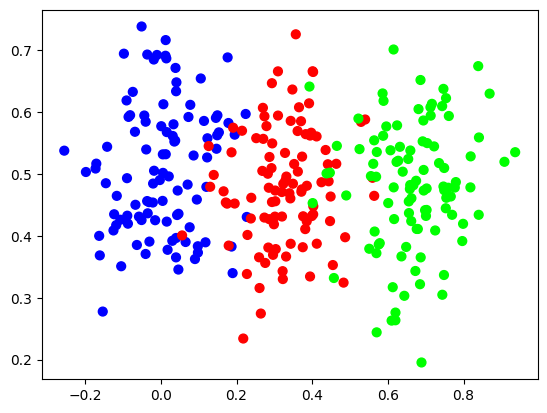

In [33]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()



Utilizando la estructura computacional del ejercicio anterior, realiza un proceso iterativo (máximo 10000 iteraciones) en el que se vayan cambiando los pesos y sesgos de ambas capas de forma aleatoria (distribución normal de media 0 y varianza 0.05). Almacena el resultado que dé lugar a una menor pérdida. Comenta el decrecimiento de la función de pérdidas durante el proceso.

In [34]:
# SOL EJ 16
# Pista - usa 0.05 * np.random.randn para generar los arrays de números aleatorios que necesites
nnfs.init()

# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 99999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases  = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases  = dense2.biases.copy()

for iteration in range(10000):
    dense1.weights = np.random.randn(2,3) * 0.05 # varianza: 0.05 -> desviación: sqrt(0.05) 
    dense1.biases  = np.random.randn(1,3) * 0.05 
    dense2.weights = np.random.randn(3,3) * 0.05 
    dense2.biases  = np.random.randn(1,3) * 0.05 

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0986564
New set of weights found, iteration: 3 loss: 1.098138
New set of weights found, iteration: 117 loss: 1.0980115
New set of weights found, iteration: 124 loss: 1.0977516
New set of weights found, iteration: 165 loss: 1.0975711
New set of weights found, iteration: 552 loss: 1.0974693
New set of weights found, iteration: 778 loss: 1.0968257
New set of weights found, iteration: 4307 loss: 1.0965533
New set of weights found, iteration: 4615 loss: 1.0964499
New set of weights found, iteration: 9450 loss: 1.0964295


## Ejercicio 17: Optimización — modificación aleatoria de pesos (II)

 - **17.a** Repite el ejercicio anterior con un enfoque ligeramente distinto: en lugar de fijar nuevos parámetros elegios al azar en cada iteración, suma una fracción aleatoria (distribución normal de media 0 y varianza 0.05) a los parámetros actuales y comprueba si esos nuevos valores dan lugar a una pérdida menor. Comenta si este enfoque funciona mejor o peor que el anterior.


In [35]:
# ##################### PEDIDO #####################
# SOL EJ 17a

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 99999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases  = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases  = dense2.biases.copy()

for iteration in range(10000):
    # np.random.normal(mean, deviation, size)
    dense1.weights += np.random.normal(0, np.sqrt(0.05), size=(2,3)) 
    dense1.biases  += np.random.normal(0, np.sqrt(0.05), size=(1,3))
    dense2.weights += np.random.normal(0, np.sqrt(0.05), size=(3,3))
    dense2.biases  += np.random.normal(0, np.sqrt(0.05), size=(1,3))

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.1009585
New set of weights found, iteration: 1 loss: 1.0988576
New set of weights found, iteration: 12 loss: 1.063549
New set of weights found, iteration: 17 loss: 1.0497687
New set of weights found, iteration: 20 loss: 1.0414569
New set of weights found, iteration: 26 loss: 0.8681615


***Este nuevo enfoque produce el encuentro de una pérdida menor que el caso anterior, y el gran avance se produce por la tempraneidad en la que la encuentra.***

 - **17.b** Prueba también este enfoque con los datos de la triple espiral.

In [36]:
# ##################### PEDIDO #####################
# SOL EJ 17b
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

nnfs.init()

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 99999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases  = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases  = dense2.biases.copy()

for iteration in range(10000):
    # np.random.normal(mean, deviation, size)
    dense1.weights += np.random.normal(0, np.sqrt(0.05), size=(2,3)) 
    dense1.biases  += np.random.normal(0, np.sqrt(0.05), size=(1,3))
    dense2.weights += np.random.normal(0, np.sqrt(0.05), size=(3,3))
    dense2.biases  += np.random.normal(0, np.sqrt(0.05), size=(1,3))

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.1225766


## Ejercicio 18: Introducción a la *backpropagation*

La siguiente imagen corresponde a una simple neurona + f. activación, con 3 inputs. Los valores de inputs, pesos y sesgo se han fijado aleatoriamente. En la imagen también se indica en rojo el valor del gradiente recibido de una capa posterior (en este ejemplo, $1$):

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple_gradiente.png&t=nJHrGFJQ8VVuZK7&scalingup=0" width="500"/>
</div>
</center>

Pensemos en esta neurona como una gran función, cuyas variables independientes o parámetros de entrada son los inputs, pesos y sesgo. Esta gran función consiste en varias funciones más simples: hay una multiplicación de inputs y pesos, suma de estos valores y el sesgo, así como una la función activación ReLU - 3 funciones encadenadas en total:
$$
\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)
$$
Para calcular cómo afecta cada variable al resultado, debemos calcular sus derivadas parciales. Como hay varias funciones combinadas, debemos aplicar la regla de la cadena.

Calcula cómo impacta en **el input $x_0$** el gradiente recibido, es decir:

$$
\begin{aligned}
& \frac{\partial}{\partial x_0}\left[\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)\right]
\end{aligned}
$$

In [37]:
# SOL EJ 18

w = [-3, -1, 2]
x = [1, -2, 3]
b = 1
dvalue = 1
input_relu = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + b

dL_dx0 = dvalue * (1.0 if input_relu > 0 else 0.0) * w[0]
print(dL_dx0)

-3.0


## Ejercicio 19: Capa densa con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 9, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass (excluyendo la función de activación). El parámetro ```dvalues``` es una matriz donde cada fila se refiere a una observación del batch, y cada elemento de dicha fila es el gradiente llegado de aguas abajo. Dicho método debe calcular los valores ```self.dweights```, ```self.dbiases``` y ```self.dinputs``` que recogen las distintas derivadas parciales para cada parámetro. Presta atención a las dimensiones.

In [38]:
# SOL EJ 19

import numpy as np

class Layer_Dense:

    def __init__(self, n_inputs, n_neuronas):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neuronas)
        self.biases = np.zeros((1, n_neuronas))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Pista - para cuadrar las dimensiones en las multiplicaciones, recuerda que:
        # - 'dvalues' tiene la misma dimensión que la salida de la capa: (batch_size (fila), n_neurons (columna))
        # - Cada gradiente debe tener las mismas dimensiones que los parámetros correspondientes: 
        # e.g. self.dweights debe tener las mismas dimensiones que las que tenía self.weights (recuerda que en este caso eran (n_inputs, n_neurons))

        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

## Ejercicio 20: ReLU con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 11, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.

In [39]:
# SOL EJ 20

class Activation_ReLU:

    def forward(self, inputs):

        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0.0

## Ejercicio 21: Función de pérdidas con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 15, incluyendo un nuevo método llamado ```backward(self, dvalues, y_true)``` que implemente el backward pass. El parámetro ```dvalues``` son los valores predichos ($\hat{y}_{i,j}$) y ```y_true``` son los valores objetivo. El método debe calcular los valores ```self.dinputs```, el vector derivada respecto a los inputs. Ten en cuenta lo siguiente:
 - Debes convertir los ```y_true``` en *one-hot* vectors.
 - Una vez calcules la derivada según el desarrollo teórico, normaliza el resultado. Esto evitará problemas con muestras grandes en pasos posteriores. Simplemente divide el resultado final por la longitud de la muestra (```len(dvalues)```)

In [40]:
#!######################## PEDIDO ########################
# SOL EJ 21

class Loss_CategoricalCrossentropy(Loss):

    def forward(self, output, y):
        sample = len(output)
        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)  # evita inestabilidades en la evaluación del logaritmo
        correct_confidences = y_pred_clipped[range(sample), y]
        negative_log_probs = - np.log(correct_confidences)

        return negative_log_probs

    def backward(self, y_hat: np.ndarray[np.ndarray], y_true: np.ndarray):
        # Número de muestras -> obtenla apropiadamente de las dimensiones de y_hat
        samples = y_hat.shape[0]

        # Número de etiquetas en cada muestra -> obtenla apropiadamente de las dimensiones de y_hat. Se usará en la siguiente operación
        labels = y_hat.shape[1]

        # y_true inicialmente es un array 1D de índices de clases, necesitamos convertirlo a vectores one-hot
        y_true = np.eye(labels)[y_true]

        # Calcula el gradiente directamente, aprovechando las propiedades de los arrays de numpy
        self.dinputs = y_hat - y_true

        # Normaliza el gradiente
        self.dinputs /= samples

## Ejercicio 22: SoftMax con *backpropagation*

Se pretende extender la implementación que hiciste en el ejercicio 12, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.
 - **22a.** Comienza calculando un caso particular. Supón que la salida de la función Softmax ha sido ```softmax_output = [0.7, 0.1, 0.2]```. El resultado debe ser una matriz (el Jacobiano) de dimensión $3x3$.

In [41]:
#!######################## PEDIDO ########################
# SOL 22a

import numpy as np
    
softmax_output = np.array([[0.7, 0.1, 0.2]]) 

single_output = softmax_output[0]
single_output = single_output.reshape(-1, 1)
jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

print(jacobian_matrix)

[[ 0.20999999 -0.07       -0.14      ]
 [-0.07        0.09       -0.02      ]
 [-0.14       -0.02        0.16      ]]


 - **22b.** Generaliza el código anterior. Extiende la clase del ejercicio 12 con el método llamado ```backward(self, dvalues)```. A continuación se incluye una plantilla de desarrollo que debe ser completada. Recuerda copiar el resto de métodos de la clase.

In [42]:
#!######################## PEDIDO ########################
# SOL 22b

class Activation_Softmax:

    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    # Paso hacia atrás
    def backward(self, dvalues: np.ndarray[np.ndarray]):
        # Crear un array no inicializado con la misma dimensión que dvalues
        # self.dinputs = np.empty(dvalues.shape[0])
        self.dinputs = np.empty_like(dvalues)

        # Enumerar salidas y gradientes
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Aplanar el array de salida - usa 'reshape'
            single_output = single_output.reshape(-1, 1)

            # Calcular la matriz Jacobiana de la salida
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            # Calcular el gradiente por muestra y añadirlo al array de gradientes por muestra
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

## Ejercicio 23: Softmax + entropía cruzada

Al calcular juntas las derivadas de la función Softmax y la función de pérdidas de entropía cruzada categórica, los cáluclos se simplifican notablemente. Implementa el método que hace el *backward pass* (i.e. ```backward(self, dvalues, y_true)```) de nueva clase llamada ```Activation_Softmax_Loss_CategoricalCrossentropy``` (el resto de métodos se dan ya implementados). Recuerda normalizar el resultado dividiéndolo por el número de muestras (```len(dvalues)```) para evitar problemas en pasos futuros.

In [43]:
# SOL EJ 23

class Activation_Softmax_Loss_CategoricalCrossentropy:

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)

        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, y_hat, y_true):
        samples = len(y_hat)

        self.dinputs = y_hat.copy()
        self.dinputs[range(samples), y_true] -= 1

        # Normalization -> para evitar "valores explosivos"
        self.dinputs = self.dinputs / samples

## Ejercicio 24: Comprobación Softmax + entropía cruzada

Se pretende comprobar si el *backpropagation* combinado (Softmax + entropía cruzada) devuelve los mismos valores en comparación con cuando retropropagamos gradientes a través de ambas funciones por separado. Para este ejemplo, vamos a crear una salida de la función Softmax y algunos valores objetivo. Retropropágalos utilizando ambas soluciones, y comprueba que obtienes los mismos resultados

In [44]:
#!######################## PEDIDO ########################
# SOL EJ 24

import numpy as np
import nnfs

nnfs.init()

# Valores de ejemplo: salidas de la función Softmax y etiquetas de clase objetivo
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])

# Método Combinando Softmax y entropía cruzada en un solo objeto
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(y_hat=softmax_outputs, y_true=class_targets)
dinputs_combined = softmax_loss.dinputs

# Método separando Softmax y entropía cruzada
activation = Activation_Softmax()
loss = Loss_CategoricalCrossentropy()
activation.output = softmax_outputs
loss.calculate(activation.output, class_targets)
loss.backward(y_hat=softmax_outputs, y_true=class_targets)
dinputs_separate = loss.dinputs

# Imprimir los gradientes obtenidos
print(f'Gradients: combined loss and activation:\n {dinputs_combined}')
print(f'Gradients: separate loss and activation:\n {dinputs_separate}')

Gradients: combined loss and activation:
 [[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separate loss and activation:
 [[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


## Ejercicio 25: *Backward pass* de toda la red

Realiza un *backward pass* de la red que usaste en el ejercicio *15b*.

In [45]:
# SOL EJ 25

# Arquitectura
dense1 = Layer_Dense(2, 3) # 2 entradas, 3 neuronas
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # output 3 por las 3 clases
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Forward
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y)

# Backward
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

print(f"Pérdidas = {loss}")
print(activation2.output[:5])

Pérdidas = 1.098616361618042
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


## Ejercicio 26: Optimizador — Descenso del gradiente

Programa una clase llamada ```Optimizer_SGD``` que implemente el optimizador de descenso de gradiente. Pasa a su constructor un parámetro ```learning_rate``` por defecto de $1$. Dicha clase deberá contener un único método llamado ```update_params(layer)``` al que se le pase una capa y aplique sus correspondientes gradientes a la actualización de sus parámetros.

In [46]:
# SOL EJ 26

class Optimizer_SGD:

    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

## Ejercicio 27: Optimización sobre el caso de la triple espiral

Partiendo del código al que llegaste en el ejercicio 25, añade un optimizador que actualice los parámetros de la red. Realiza 10000 iteraciones (*epoch*). Observa como evoluciona la precisión y las pérdidas a lo largo del entrenamiento.

De ahora en adelante utiliza una arquitectura con 64 neuronas por capa.

Epoch = 0,	 Pérdidas = 1.0986,	 Accuracy = 0.360
Epoch = 500,	 Pérdidas = 1.0713,	 Accuracy = 0.400
Epoch = 1000,	 Pérdidas = 1.0623,	 Accuracy = 0.400
Epoch = 1500,	 Pérdidas = 1.0430,	 Accuracy = 0.430
Epoch = 2000,	 Pérdidas = 1.0372,	 Accuracy = 0.403
Epoch = 2500,	 Pérdidas = 1.0087,	 Accuracy = 0.490
Epoch = 3000,	 Pérdidas = 0.9854,	 Accuracy = 0.543
Epoch = 3500,	 Pérdidas = 0.9927,	 Accuracy = 0.520
Epoch = 4000,	 Pérdidas = 0.9707,	 Accuracy = 0.520
Epoch = 4500,	 Pérdidas = 0.9688,	 Accuracy = 0.493
Epoch = 5000,	 Pérdidas = 0.9731,	 Accuracy = 0.510
Epoch = 5500,	 Pérdidas = 0.9659,	 Accuracy = 0.520
Epoch = 6000,	 Pérdidas = 0.9398,	 Accuracy = 0.490
Epoch = 6500,	 Pérdidas = 0.9553,	 Accuracy = 0.593
Epoch = 7000,	 Pérdidas = 0.9050,	 Accuracy = 0.593
Epoch = 7500,	 Pérdidas = 0.9140,	 Accuracy = 0.607
Epoch = 8000,	 Pérdidas = 0.8736,	 Accuracy = 0.617
Epoch = 8500,	 Pérdidas = 0.8381,	 Accuracy = 0.630
Epoch = 9000,	 Pérdidas = 0.8717,	 Accuracy = 0.570
Epoch = 9500,	 P

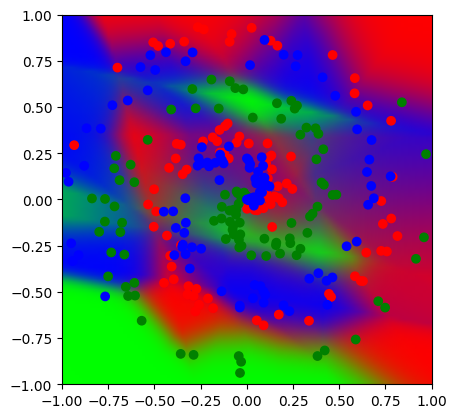

In [47]:
#SOL 27

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64) # 2 entradas, 3 neuronas
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3) # output 3 por las 3 clases
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD()

# Entrenamiento
for epoch in range(10000):
    # Forward
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if epoch % 500 == 0:
        print(f"Epoch = {epoch},\t Pérdidas = {loss:.4f},\t Accuracy = {accuracy:.3f}")

    # Backward
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs) 
    
    # update parameters
    optimizer.update_params(dense1)   
    optimizer.update_params(dense2)   

# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que la lista 'model' contiene los mismos nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 28: Misma solución utilizando ```keras```

Busca documentación sobre cómo implementar redes neuronales con el módulo ```tf.keras``` (echa un vistazo por ejemplo a [este enlace](https://stackoverflow.com/questions/64689483/how-to-do-multiclass-classification-with-keras), o [este otro](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)). Crear una arquitectura similar a la usada en el ejercicio anterior, directamente usando las herramientas disponibles en dicho paquete.

In [48]:
import time
import tensorflow as tf
import keras.losses
import keras.optimizers
import keras.metrics
import keras.models
from keras.layers import Dense
from keras.utils import to_categorical
from nnfs.datasets import spiral_data

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.9.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [49]:
#!##################### PEDIDO #####################
# SOL EJ 28

X, y = spiral_data(samples=100, classes=3)

y = to_categorical(y, num_classes=3)

model = keras.models.Sequential()
model.add(Dense(64,activation='relu',input_dim=2))
model.add(Dense(3,activation='softmax'))

model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(
  optimizer=keras.optimizers.SGD(),
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

inicio = time.time()

history = model.fit(x=X,
                    y=y,
                    epochs=500,
                    batch_size=32,
                    verbose=0,
)

fin = time.time()
tiempo = fin - inicio
minutos = int(tiempo/60)
print(f'Tiempo entrenamiento: {minutos} min {round(tiempo-60*minutos,2)} s')

Tiempo entrenamiento: 0 min 12.46 s


In [51]:
model.evaluate(X,y, batch_size=16)

19/19 [==============================] - 0s 3ms/step - loss: 1.0665 - accuracy: 0.4267 - precision: 1.0000 - recall: 0.0233    


[1.0665158033370972, 0.4266666769981384, 1.0, 0.023333333432674408]

## Ejercicio 29: *Learning rate decay*

 - **29.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 26 para que incluya un mecanismo que aplique el decaimiento de la tasa de aprendizaje. Ahora, además del argumento ```learning_rate```, el constructor de la clase recibirá el ```decay```. En dicho constructor, inicializa también dos variables adicionales: ```self.current_learning_rate``` (para ir almacenando el *learning rate* en sucesivas iteraciones) y ```self.iterations``` (para ir almacenando el número de iteraciones). Actualiza el método ```update_params``` e implementa dos nuevos métodos:
   - ```pre_update_params(self)```: responsable de actualizar ```self.current_learning_rate```. Está pensado para será ejecutado justo antes de la llamada a ```update_params```.
   - ```post_update_params(self)```: responsable de actualizar ```self.iterations```. Está pensado para será ejecutado justo después de la llamada a ```update_params```.


In [52]:
# SOL EJ 29a

class Optimizer_SGD:

    def __init__(self, learning_rate=1.0, decay=0.0):
        self.learning_rate = learning_rate
        self.decay = decay
        self.current_learning_rate = learning_rate
        self.iterations = 0

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    def post_update_params(self):
        self.iterations += 1

  - **29.b** Partiendo del código al que llegaste en el ejercicio 27, prueba el mecanismo de *Learning rate decay* que acabas de implementar. Experimenta con un *decay* de $10^{-2}$ y de $10^{-3}$ ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 27? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Epoch = 0,	 Pérdidas = 1.0986,	 Accuracy = 0.360
Epoch = 500,	 Pérdidas = 1.0742,	 Accuracy = 0.403
Epoch = 1000,	 Pérdidas = 1.0631,	 Accuracy = 0.443
Epoch = 1500,	 Pérdidas = 1.0405,	 Accuracy = 0.413
Epoch = 2000,	 Pérdidas = 0.9996,	 Accuracy = 0.490
Epoch = 2500,	 Pérdidas = 0.9987,	 Accuracy = 0.440
Epoch = 3000,	 Pérdidas = 0.9771,	 Accuracy = 0.487
Epoch = 3500,	 Pérdidas = 0.9550,	 Accuracy = 0.517
Epoch = 4000,	 Pérdidas = 0.9319,	 Accuracy = 0.537
Epoch = 4500,	 Pérdidas = 0.9127,	 Accuracy = 0.560
Epoch = 5000,	 Pérdidas = 0.8935,	 Accuracy = 0.563
Epoch = 5500,	 Pérdidas = 0.8767,	 Accuracy = 0.587
Epoch = 6000,	 Pérdidas = 0.8626,	 Accuracy = 0.587
Epoch = 6500,	 Pérdidas = 0.8468,	 Accuracy = 0.583
Epoch = 7000,	 Pérdidas = 0.8357,	 Accuracy = 0.593
Epoch = 7500,	 Pérdidas = 0.8198,	 Accuracy = 0.607
Epoch = 8000,	 Pérdidas = 0.8063,	 Accuracy = 0.593
Epoch = 8500,	 Pérdidas = 0.7928,	 Accuracy = 0.597
Epoch = 9000,	 Pérdidas = 0.7820,	 Accuracy = 0.633
Epoch = 9500,	 P

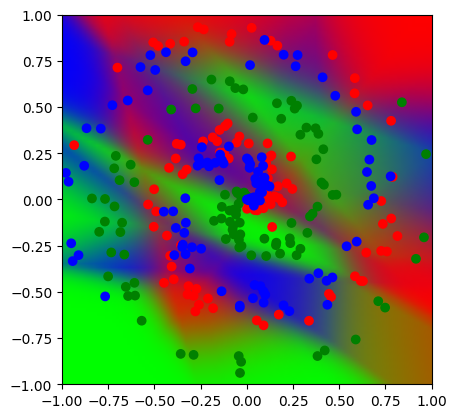

In [53]:
# SOL EJ 29b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64) # 2 entradas, 3 neuronas
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3) # output 3 por las 3 clases
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay=1e-3)

# Entrenamiento
for epoch in range(10000):
    # Forward
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if epoch % 500 == 0:
        print(f"Epoch = {epoch},\t Pérdidas = {loss:.4f},\t Accuracy = {accuracy:.3f}")

    # Backward
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs) 
    
    # update parameters
    optimizer.pre_update_params()
    optimizer.update_params(dense1)   
    optimizer.update_params(dense2)
    optimizer.post_update_params()   

# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 30: Descenso de gradiente con momentum

 - **30.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 29 para que incluya el mecanismo de *momentum*. Sigue la siguiente plantilla de desarrollo:

In [54]:
# SOL EJ 30a -> completa las líneas con ######

# Optimizador SGD con momentum
class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):

        # Si usamos momentum, creamos arrays de momentum si no existen. Inicializados en ceros
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Calcular actualizaciones de pesos y sesgos con momentum
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Calcular actualizaciones de pesos y sesgos sin momentum (como en ejercicios anteriores)
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases
            
        # Actualizar pesos y sesgos usando actualizaciones con o sin momentum
        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1

  - **30.b** Partiendo del código al que llegaste en el ejercicio 29, prueba el mecanismo de momentum que acabas de implementar. Probar con un *decay* de $10^{-3}$ y un *momentum* de $0.5$ y luego de $0.9$. ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 29? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Epoch = 0,	 Pérdidas = 1.0986,	 Accuracy = 0.360
Epoch = 500,	 Pérdidas = 0.6663,	 Accuracy = 0.687
Epoch = 1000,	 Pérdidas = 0.4472,	 Accuracy = 0.837
Epoch = 1500,	 Pérdidas = 0.3947,	 Accuracy = 0.840
Epoch = 2000,	 Pérdidas = 0.2818,	 Accuracy = 0.897
Epoch = 2500,	 Pérdidas = 0.2217,	 Accuracy = 0.917
Epoch = 3000,	 Pérdidas = 0.1915,	 Accuracy = 0.923
Epoch = 3500,	 Pérdidas = 0.1692,	 Accuracy = 0.940
Epoch = 4000,	 Pérdidas = 0.1581,	 Accuracy = 0.940
Epoch = 4500,	 Pérdidas = 0.1504,	 Accuracy = 0.940
Epoch = 5000,	 Pérdidas = 0.1451,	 Accuracy = 0.947
Epoch = 5500,	 Pérdidas = 0.1408,	 Accuracy = 0.947
Epoch = 6000,	 Pérdidas = 0.1375,	 Accuracy = 0.943
Epoch = 6500,	 Pérdidas = 0.1348,	 Accuracy = 0.947
Epoch = 7000,	 Pérdidas = 0.1324,	 Accuracy = 0.947
Epoch = 7500,	 Pérdidas = 0.1300,	 Accuracy = 0.947
Epoch = 8000,	 Pérdidas = 0.1278,	 Accuracy = 0.950
Epoch = 8500,	 Pérdidas = 0.1258,	 Accuracy = 0.953
Epoch = 9000,	 Pérdidas = 0.1242,	 Accuracy = 0.957
Epoch = 9500,	 P

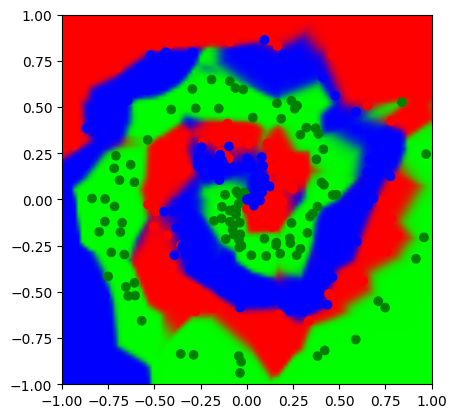

In [55]:
# SOL EJ 30b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64) # 2 entradas, 3 neuronas
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3) # output 3 por las 3 clases
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay=1e-3, momentum=0.9)

# Entrenamiento
for epoch in range(10000):
    # Forward
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if epoch % 500 == 0:
        print(f"Epoch = {epoch},\t Pérdidas = {loss:.4f},\t Accuracy = {accuracy:.3f}")

    # Backward
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs) 
    
    # update parameters
    optimizer.pre_update_params()
    optimizer.update_params(dense1)   
    optimizer.update_params(dense2)
    optimizer.post_update_params()   

model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 31: RMS Prop

 - **31.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_RMSprop``` que implemente este optimizador. RMSProp utiliza una media móvil de la caché:

    ```python
    cache = rho * cache + (1 - rho) * gradient ** 2
    ```

    Que luego se usará en la actualización de cada parámetro individual como:

    ```python
    parm_updates = learning_rate * parm_gradient / (sqrt(cache) + eps)
    ```
    Sigue la siguiente plantilla de desarrollo:

In [56]:
################### PEDIDO ###################
# SOL EJ 31a

# RMSprop con momentum
class Optimizer_RMSprop:

    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    # Actualizar parámetros usando RMSprop con momentum
    def update_params(self, layer):
        # Si los arrays de caché no existen, crearlos llenos de ceros
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        """
        cache = rho * cache + (1 - rho) * gradient ** 2
        Que luego se usará en la actualización de cada parámetro individual como:
        parm_updates = learning_rate * parm_gradient / (sqrt(cache) + eps)
        """
        # Actualizar la caché con los gradientes actuales al cuadrado
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * (layer.dweights ** 2)
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * (layer.dbiases ** 2)

        # Actualizar pesos y sesgos usando RMSprop con momentum
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

  - **31.b** Partiendo del código al que llegaste en el ejercicio 30, prueba el optimizador que acabas de implementar. Prueba primero con un *decay* de $10^{-4}$ y el resto de parámetros por defecto. Prueba luego con ```learning_rate=0.02, decay=1e-5, rho=0.999``` ¿Se consigue mejorar los resultados en comparación con los del ejercicio 30? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Epoch = 0,	 Pérdidas = 1.0986,	 Accuracy = 0.360
Epoch = 500,	 Pérdidas = 0.8019,	 Accuracy = 0.633
Epoch = 1000,	 Pérdidas = 0.6373,	 Accuracy = 0.730
Epoch = 1500,	 Pérdidas = 0.5661,	 Accuracy = 0.763
Epoch = 2000,	 Pérdidas = 0.4671,	 Accuracy = 0.783
Epoch = 2500,	 Pérdidas = 0.4192,	 Accuracy = 0.830
Epoch = 3000,	 Pérdidas = 0.3901,	 Accuracy = 0.830
Epoch = 3500,	 Pérdidas = 0.3493,	 Accuracy = 0.840
Epoch = 4000,	 Pérdidas = 0.3489,	 Accuracy = 0.850
Epoch = 4500,	 Pérdidas = 0.3287,	 Accuracy = 0.860
Epoch = 5000,	 Pérdidas = 0.3125,	 Accuracy = 0.863
Epoch = 5500,	 Pérdidas = 0.2973,	 Accuracy = 0.883
Epoch = 6000,	 Pérdidas = 0.2679,	 Accuracy = 0.887
Epoch = 6500,	 Pérdidas = 0.2792,	 Accuracy = 0.863
Epoch = 7000,	 Pérdidas = 0.2602,	 Accuracy = 0.890
Epoch = 7500,	 Pérdidas = 0.8562,	 Accuracy = 0.727
Epoch = 8000,	 Pérdidas = 0.2556,	 Accuracy = 0.893
Epoch = 8500,	 Pérdidas = 0.3972,	 Accuracy = 0.850
Epoch = 9000,	 Pérdidas = 0.2451,	 Accuracy = 0.897
Epoch = 9500,	 P

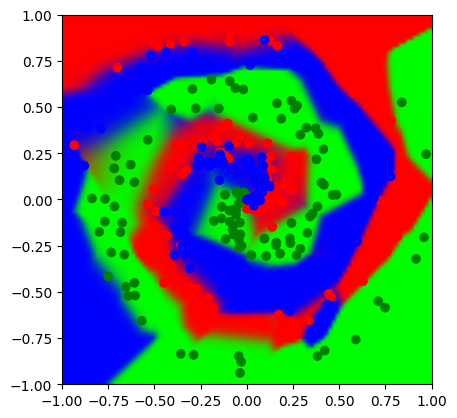

In [57]:
################### PEDIDO ###################
# SOL EJ 31b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64) # 2 entradas, 3 neuronas
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3) # output 3 por las 3 clases
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# optimizer = Optimizer_RMSprop(decay=1e-4)
optimizer = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5, rho=0.999)

# Entrenamiento
for epoch in range(10000):
    # Forward
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)
    
    predictions = np.argmax(loss_activation.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if epoch % 500 == 0:
        print(f"Epoch = {epoch},\t Pérdidas = {loss:.4f},\t Accuracy = {accuracy:.3f}")

    # Backward
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs) 
    
    # update parameters
    optimizer.pre_update_params()
    optimizer.update_params(dense1)   
    optimizer.update_params(dense2)
    optimizer.post_update_params()   

model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

***La segunda configuración realiza un ajuste más fino que la primera, sin embargo, no supera al anterior optimizador (SGD)***

## Ejercicio 32: Adam

 - **32.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_Adam``` que implemente este optimizador. Adam añade a RMSProp el mecanismo de momentum ($\beta_1$). También añade además un mecanismo de corrección de sesgo, dividiendo tanto el momentum como el caché por $1-\beta_1^{step}$.

In [58]:
# SOL EJ 32a

# Optimizador Adam
class Optimizer_Adam:

    # Inicializar el optimizador - establecer configuraciones
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1  # momentum, y para la corrección descrita arriba
        self.beta_2 = beta_2  # renombrar el antiguo rho de RMSProp -> usado para la caché

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):

        # Si la capa no contiene arrays de caché, crearlos llenos de ceros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Actualizar el momentum con los gradientes actuales
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights # m_t
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases      # m_t

        # Actualizar la caché con los gradientes actuales al cuadrado
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * (layer.dweights**2) # v_t
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * (layer.dbiases**2)      # v_t
        
        # Obtener el momentum y la caché corregidos (self.iteration es 0 en el primer paso, y necesitamos empezar con 1 aquí) -> así que dividir por (1 - self.beta_1 ** (self.iterations + 1))
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1)) # m_hat_t
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))     # m_hat_t
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1)) # v_hat_t
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))     # v_hat_t

        # Actualización de parámetros de SGD + normalización con la caché enraizada
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1        

  - **32.b** Partiendo del código al que llegaste en el ejercicio 31, prueba el optimizador que acabas de implementar. Prueba primero con ```Optimizer_Adam(learning_rate=0.02, decay=1e-5)```, y luego con ```Optimizer_Adam(learning_rate=0.05, decay=5e-7)```. ¿Se consigue mejorar los resultados en comparación con los del ejercicio 31? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

Epoch = 0,	 Pérdidas = 1.0986,	 Accuracy = 0.360
Epoch = 500,	 Pérdidas = 0.3356,	 Accuracy = 0.873
Epoch = 1000,	 Pérdidas = 0.2382,	 Accuracy = 0.913
Epoch = 1500,	 Pérdidas = 0.1920,	 Accuracy = 0.917
Epoch = 2000,	 Pérdidas = 0.1621,	 Accuracy = 0.933
Epoch = 2500,	 Pérdidas = 0.1449,	 Accuracy = 0.940
Epoch = 3000,	 Pérdidas = 0.1323,	 Accuracy = 0.947
Epoch = 3500,	 Pérdidas = 0.1244,	 Accuracy = 0.947
Epoch = 4000,	 Pérdidas = 0.1197,	 Accuracy = 0.960
Epoch = 4500,	 Pérdidas = 0.1147,	 Accuracy = 0.953
Epoch = 5000,	 Pérdidas = 0.1097,	 Accuracy = 0.947
Epoch = 5500,	 Pérdidas = 0.1055,	 Accuracy = 0.950
Epoch = 6000,	 Pérdidas = 0.0985,	 Accuracy = 0.960
Epoch = 6500,	 Pérdidas = 0.0953,	 Accuracy = 0.957
Epoch = 7000,	 Pérdidas = 0.0923,	 Accuracy = 0.967
Epoch = 7500,	 Pérdidas = 0.0893,	 Accuracy = 0.960
Epoch = 8000,	 Pérdidas = 0.0880,	 Accuracy = 0.967
Epoch = 8500,	 Pérdidas = 0.0850,	 Accuracy = 0.960
Epoch = 9000,	 Pérdidas = 0.0834,	 Accuracy = 0.960
Epoch = 9500,	 P

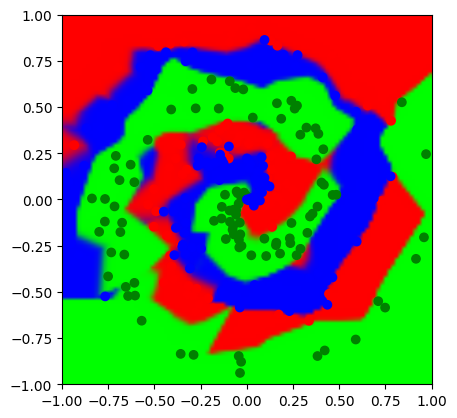

In [59]:
# SOL EJ 32b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64) # 2 entradas, 3 neuronas
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3) # output 3 por las 3 clases
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)
# optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-7)

# Entrenamiento
for epoch in range(10000):
    # Forward
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)
    
    # cálculo de accuracy -> entender
    predictions = np.argmax(loss_activation.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if epoch % 500 == 0:
        print(f"Epoch = {epoch},\t Pérdidas = {loss:.4f},\t Accuracy = {accuracy:.3f}")

    # Backward
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs) 
    
    # update parameters
    optimizer.pre_update_params()
    optimizer.update_params(dense1)   
    optimizer.update_params(dense2)
    optimizer.post_update_params()   

model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

 - **32.c** Interpreta los resultados que acabas de obtener. ¿Crees que la red ha aprendido correctamente la naturaleza de los datos de entrenamiento? Si no es así, investiga qué puede estar pasando y discute posibles soluciones (no es necesario implementar nada).

In [ ]:
#!######################## PEDIDO ########################
# SOL EJ 32c
"""
Se observa que el modelo ha aprendido a predecir la posición de los puntos bastante bien, sin embargo, 
no parece obtener de forma gráfica la naturaleza real de los datos: una espiral, ya que la forma es bastante irregular 
y se deforma con tal de que la predicción esté correctamente alineada a los puntos.

Por tanto, se puede deducir que se ha provocado un sobreajuste (overfitting) en el modelo. Lo que le conllevaría a 
no aprender con la misma precisión otros datos similares a la hora de validar el modelo.   
"""